In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [4]:
pd.set_option("display.max_columns", None)
pd.set_option("display.min_rows", 20)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [23]:
train["IsTrain"] = 1
test["IsTrain"] = 0

In [31]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1


In [32]:
test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,IsTrain
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,0


In [24]:
df = pd.concat([train, test])

In [35]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [40]:
df[df.columns[55:]]

,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain
0,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,0


In [41]:
df[df.columns[55:]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Functional     2917 non-null   object 
 1   Fireplaces     2919 non-null   int64  
 2   FireplaceQu    1499 non-null   object 
 3   GarageType     2762 non-null   object 
 4   GarageYrBlt    2760 non-null   float64
 5   GarageFinish   2760 non-null   object 
 6   GarageCars     2918 non-null   float64
 7   GarageArea     2918 non-null   float64
 8   GarageQual     2760 non-null   object 
 9   GarageCond     2760 non-null   object 
 10  PavedDrive     2919 non-null   object 
 11  WoodDeckSF     2919 non-null   int64  
 12  OpenPorchSF    2919 non-null   int64  
 13  EnclosedPorch  2919 non-null   int64  
 14  3SsnPorch      2919 non-null   int64  
 15  ScreenPorch    2919 non-null   int64  
 16  PoolArea       2919 non-null   int64  
 17  PoolQC         10 non-null     object 
 18  Fence   

In [45]:
df[df.columns[55:]].sample(10)

,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain
1279,Typ,0,NaN,Attchd,1963.0,RFn,2.0,430.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal,NaN,0
531,Typ,1,TA,Attchd,2000.0,RFn,2.0,431.0,TA,TA,Y,108,0,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,NaN,0
678,Typ,1,Gd,Attchd,2008.0,Fin,3.0,834.0,TA,TA,Y,322,82,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,372500.0,1
1171,Typ,1,TA,Attchd,1958.0,RFn,2.0,433.0,TA,TA,Y,0,0,0,0,288,0,NaN,NaN,Shed,1400,11,2008,WD,Normal,163000.0,1
42,Typ,0,NaN,Attchd,1983.0,RFn,2.0,504.0,TA,Gd,Y,240,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000.0,1
279,Typ,1,Gd,Attchd,2008.0,Fin,2.0,561.0,TA,TA,Y,0,254,0,0,0,0,NaN,NaN,NaN,0,1,2009,New,Partial,NaN,0
1338,Typ,0,NaN,BuiltIn,2002.0,RFn,2.0,492.0,TA,TA,Y,146,91,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,200000.0,1
809,Typ,1,TA,Attchd,1981.0,RFn,2.0,484.0,TA,TA,Y,167,72,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,NaN,0
680,Typ,1,Po,Basment,1978.0,Fin,2.0,504.0,TA,TA,Y,311,0,0,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,NaN,0
1275,Min1,1,Gd,Attchd,1949.0,Unf,1.0,234.0,TA,TA,Y,245,60,0,0,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,NaN,0


MiscFeature describes special features of the property, such as elevator and tennis court. Most of the properties do not have such features, but when present they can affect the price significantly.

In [56]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,IsTrain
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,0
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,0
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,0
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lv

In [79]:
df[["MiscFeature", "MiscVal", "SalePrice"]][df["MiscVal"]!=0 & df["SalePrice"].notna()].sort_values("MiscVal", ascending=False)

,MiscFeature,MiscVal,SalePrice
1089,NaN,17000,NaN
346,Gar2,15500,151500.0
1,Gar2,12500,NaN
1230,Gar2,8300,190000.0
613,Othr,6500,NaN
1330,Gar2,4500,NaN
709,Shed,4500,NaN
705,Othr,3500,55000.0
1237,Othr,3000,NaN
734,Gar2,3000,NaN


In [48]:
df["MiscFeature"].value_counts()

Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64

In [87]:
df[df.columns[55:]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Functional     2917 non-null   object 
 1   Fireplaces     2919 non-null   int64  
 2   FireplaceQu    1499 non-null   object 
 3   GarageType     2762 non-null   object 
 4   GarageYrBlt    2760 non-null   float64
 5   GarageFinish   2760 non-null   object 
 6   GarageCars     2918 non-null   float64
 7   GarageArea     2918 non-null   float64
 8   GarageQual     2760 non-null   object 
 9   GarageCond     2760 non-null   object 
 10  PavedDrive     2919 non-null   object 
 11  WoodDeckSF     2919 non-null   int64  
 12  OpenPorchSF    2919 non-null   int64  
 13  EnclosedPorch  2919 non-null   int64  
 14  3SsnPorch      2919 non-null   int64  
 15  ScreenPorch    2919 non-null   int64  
 16  PoolArea       2919 non-null   int64  
 17  PoolQC         10 non-null     object 
 18  Fence   

In [90]:
df.drop("PoolQC", axis=1, inplace=True)

In [92]:
df[["YearBuilt", "GarageYrBlt"]].corr()

,YearBuilt,GarageYrBlt
YearBuilt,1.000000,0.834812
GarageYrBlt,0.834812,1.000000


In [97]:
for col in df[df.columns[55:]].columns:
    print(col)
    print(df[col].unique(),"\n")

Functional
['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev' nan] 

Fireplaces
[0 1 2 3 4] 

FireplaceQu
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 

GarageType
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'] 

GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933. 1917. 1896. 1895. 2207. 1943. 1919.] 

GarageFinish
['RFn' 'Unf' 'Fin' nan] 

GarageCars
[ 2.  3.  1.  0.  4.  5. nan] 

GarageArea
[ 548.  460.  608.  642.  836.  480.  636.  484.

In [98]:
for col in df[df.columns[55:]].columns:
    print(col)
    print(df[col].value_counts(),"\n")

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64 

Fireplaces
0    1420
1    1268
2     219
3      11
4       1
Name: Fireplaces, dtype: int64 

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64 

GarageType
Attchd     1723
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64 

GarageYrBlt
2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
1977.0     66
2008.0     61
1998.0     58
2000.0     55
1999.0     54
         ... 
1929.0      2
1917.0      2
1895.0      1
1943.0      1
2207.0      1
1908.0      1
1896.0      1
1933.0      1
1906.0      1
1919.0      1
Name: GarageYrBlt, Length: 103, dtype: int64 

GarageFinish
Unf    1230
RFn     811
Fin     719
Name: GarageFinish, dtype: int64 

GarageCars
2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCar

<AxesSubplot:>

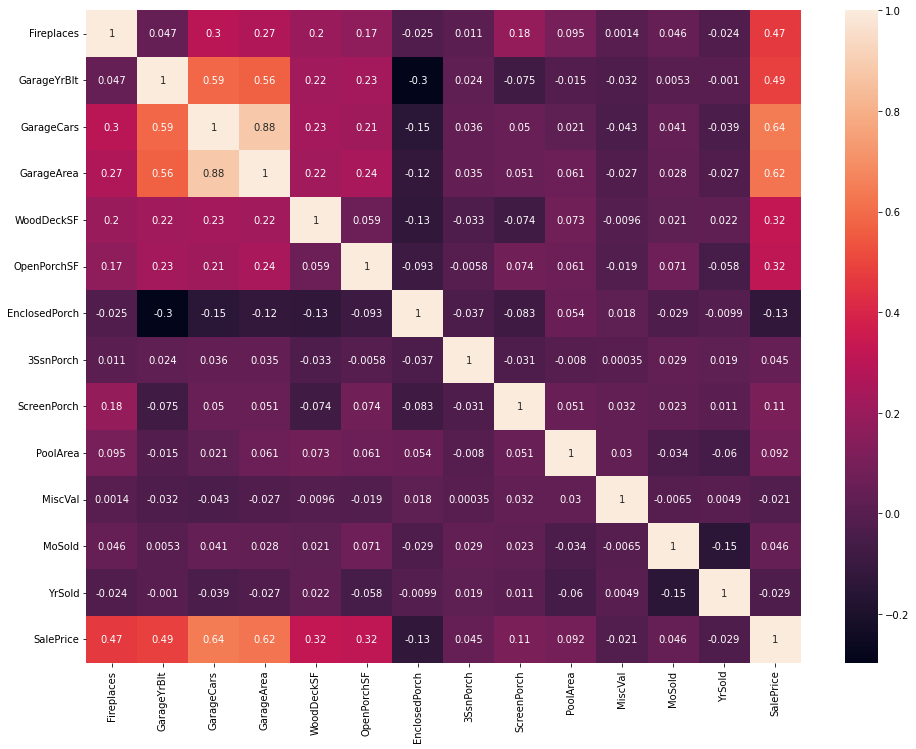

In [5]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df[df.columns[55:]].corr(), ax=ax, annot=True)

In [8]:
df[df.columns[55:]].columns

Index(['Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [28]:
first_columns=[
    'Fireplaces', 'GarageYrBlt','GarageCars', 'GarageArea', 'ExterCond', 'Foundation', 'BsmtQual',
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating',
    'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
    'TotRmsAbvGrd', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'LotFrontage', 'SalePrice',
    'IsTrain'
]

In [ ]:
df[first_columns].info()
first_columns_num = [
    "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea",
    "BsmtFinSF1", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath",
    "TotRmsAbvGrd", "OverallQual", "YearBuilt", "YearRemodAdd", 
    "MasVnrArea", "LotFrontage", "SalePrice", "IsTrain" 
]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fireplaces    2919 non-null   int64  
 1   GarageYrBlt   2760 non-null   float64
 2   GarageCars    2918 non-null   float64
 3   GarageArea    2918 non-null   float64
 4   ExterCond     2919 non-null   object 
 5   Foundation    2919 non-null   object 
 6   BsmtQual      2838 non-null   object 
 7   BsmtCond      2837 non-null   object 
 8   BsmtExposure  2837 non-null   object 
 9   BsmtFinType1  2840 non-null   object 
 10  BsmtFinSF1    2918 non-null   float64
 11  BsmtFinType2  2839 non-null   object 
 12  TotalBsmtSF   2918 non-null   float64
 13  Heating       2919 non-null   object 
 14  HeatingQC     2919 non-null   object 
 15  CentralAir    2919 non-null   object 
 16  Electrical    2918 non-null   object 
 17  1stFlrSF      2919 non-null   int64  
 18  GrLivArea     2919 non-null 

<AxesSubplot:>

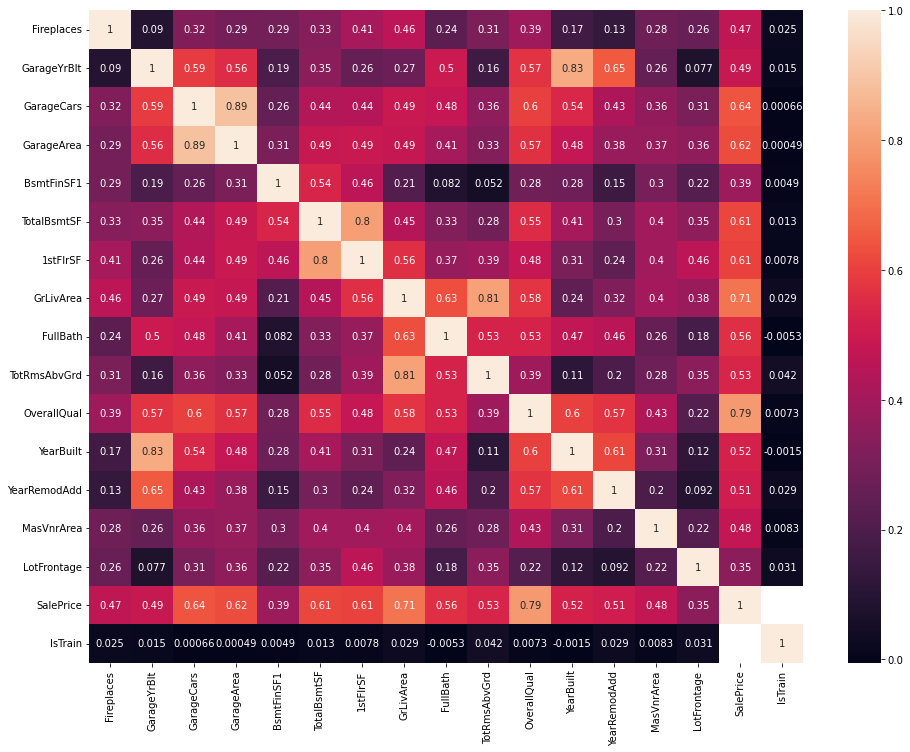

In [29]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(ax=ax, data=df[first_columns].corr(),annot=True)

In [26]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [52]:
df_v0 = df.copy()

In [53]:
df_v1 = df[first_columns_num]

In [54]:
df_v1.head()

,Fireplaces,GarageYrBlt,GarageCars,GarageArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,LotFrontage,SalePrice,IsTrain
0,0,2003.0,2.0,548.0,706.0,856.0,856,1710,2,8,7,2003,2003,196.0,65.0,208500.0,1
1,1,1976.0,2.0,460.0,978.0,1262.0,1262,1262,2,6,6,1976,1976,0.0,80.0,181500.0,1
2,1,2001.0,2.0,608.0,486.0,920.0,920,1786,2,6,7,2001,2002,162.0,68.0,223500.0,1
3,1,1998.0,3.0,642.0,216.0,756.0,961,1717,1,7,7,1915,1970,0.0,60.0,140000.0,1
4,1,2000.0,3.0,836.0,655.0,1145.0,1145,2198,2,9,8,2000,2000,350.0,84.0,250000.0,1


In [62]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fireplaces    2919 non-null   int64  
 1   GarageYrBlt   2760 non-null   float64
 2   GarageCars    2918 non-null   float64
 3   GarageArea    2918 non-null   float64
 4   BsmtFinSF1    2918 non-null   float64
 5   TotalBsmtSF   2918 non-null   float64
 6   1stFlrSF      2919 non-null   int64  
 7   GrLivArea     2919 non-null   int64  
 8   FullBath      2919 non-null   int64  
 9   TotRmsAbvGrd  2919 non-null   int64  
 10  OverallQual   2919 non-null   int64  
 11  YearBuilt     2919 non-null   int64  
 12  YearRemodAdd  2919 non-null   int64  
 13  MasVnrArea    2896 non-null   float64
 14  LotFrontage   2433 non-null   float64
 15  SalePrice     1460 non-null   float64
 16  IsTrain       2919 non-null   int64  
dtypes: float64(8), int64(9)
memory usage: 410.5 KB


In [198]:
cols_non_null = []
for col in df_v1.columns:
    if df_v1[col].isnull().sum() == 0:
        cols_non_null.append(col)

In [199]:
cols_non_null

['Fireplaces',
 '1stFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'IsTrain']

In [95]:
df_non_null_num = df_v1[cols_non_null]

In [96]:
df_non_null_num

,SalePrice,Fireplaces,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,OverallQual,YearBuilt,YearRemodAdd,IsTrain
0,208500.0,0,856,1710,2,8,7,2003,2003,1
1,181500.0,1,1262,1262,2,6,6,1976,1976,1
2,223500.0,1,920,1786,2,6,7,2001,2002,1
3,140000.0,1,961,1717,1,7,7,1915,1970,1
4,250000.0,1,1145,2198,2,9,8,2000,2000,1
5,143000.0,0,796,1362,1,5,5,1993,1995,1
6,307000.0,1,1694,1694,2,7,8,2004,2005,1
7,200000.0,2,1107,2090,2,7,7,1973,1973,1
8,129900.0,2,1022,1774,2,8,7,1931,1950,1
9,118000.0,2,1077,1077,1,5,5,1939,1950,1


In [98]:
test = df_non_null_num[df_non_null_num["IsTrain"]==0]
train = df_non_null_num[df_non_null_num["IsTrain"]==1]

In [99]:
test.drop(columns=["IsTrain"], inplace=True)
train.drop(columns=["IsTrain"], inplace=True)

d:\Programas\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [90]:
test.head()

,Fireplaces,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,OverallQual,YearBuilt,YearRemodAdd
0,0,896,896,1,5,5,1961,1961
1,0,1329,1329,1,6,6,1958,1958
2,1,928,1629,2,6,5,1997,1998
3,1,926,1604,2,7,6,1998,1998
4,0,1280,1280,2,5,8,1992,1992


In [100]:
df[first_columns_num]

,Fireplaces,GarageYrBlt,GarageCars,GarageArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,LotFrontage,SalePrice,IsTrain
0,0,2003.0,2.0,548.0,706.0,856.0,856,1710,2,8,7,2003,2003,196.0,65.0,208500.0,1
1,1,1976.0,2.0,460.0,978.0,1262.0,1262,1262,2,6,6,1976,1976,0.0,80.0,181500.0,1
2,1,2001.0,2.0,608.0,486.0,920.0,920,1786,2,6,7,2001,2002,162.0,68.0,223500.0,1
3,1,1998.0,3.0,642.0,216.0,756.0,961,1717,1,7,7,1915,1970,0.0,60.0,140000.0,1
4,1,2000.0,3.0,836.0,655.0,1145.0,1145,2198,2,9,8,2000,2000,350.0,84.0,250000.0,1
5,0,1993.0,2.0,480.0,732.0,796.0,796,1362,1,5,5,1993,1995,0.0,85.0,143000.0,1
6,1,2004.0,2.0,636.0,1369.0,1686.0,1694,1694,2,7,8,2004,2005,186.0,75.0,307000.0,1
7,2,1973.0,2.0,484.0,859.0,1107.0,1107,2090,2,7,7,1973,1973,240.0,NaN,200000.0,1
8,2,1931.0,2.0,468.0,0.0,952.0,1022,1774,2,8,7,1931,1950,0.0,51.0,129900.0,1
9,2,1939.0,1.0,205.0,851.0,991.0,1077,1077,1,5,5,1939,1950,0.0,50.0,118000.0,1


In [44]:
df[['Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', 'GrLivArea', 'FullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'LotFrontage', 'SalePrice']]

,Fireplaces,GarageYrBlt,GarageCars,GarageArea,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,GrLivArea,FullBath,KitchenQual,TotRmsAbvGrd,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,LotFrontage,SalePrice
0,0,2003.0,2.0,548.0,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,856.0,GasA,Ex,Y,SBrkr,856,1710,2,Gd,8,7,2003,2003,196.0,65.0,208500.0
1,1,1976.0,2.0,460.0,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,1262.0,GasA,Ex,Y,SBrkr,1262,1262,2,TA,6,6,1976,1976,0.0,80.0,181500.0
2,1,2001.0,2.0,608.0,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,920.0,GasA,Ex,Y,SBrkr,920,1786,2,Gd,6,7,2001,2002,162.0,68.0,223500.0
3,1,1998.0,3.0,642.0,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,756.0,GasA,Gd,Y,SBrkr,961,1717,1,Gd,7,7,1915,1970,0.0,60.0,140000.0
4,1,2000.0,3.0,836.0,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,1145.0,GasA,Ex,Y,SBrkr,1145,2198,2,Gd,9,8,2000,2000,350.0,84.0,250000.0
5,0,1993.0,2.0,480.0,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,796.0,GasA,Ex,Y,SBrkr,796,1362,1,TA,5,5,1993,1995,0.0,85.0,143000.0
6,1,2004.0,2.0,636.0,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,1686.0,GasA,Ex,Y,SBrkr,1694,1694,2,Gd,7,8,2004,2005,186.0,75.0,307000.0
7,2,1973.0,2.0,484.0,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,1107.0,GasA,Ex,Y,SBrkr,1107,2090,2,TA,7,7,1973,1973,240.0,NaN,200000.0
8,2,1931.0,2.0,468.0,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,952.0,GasA,Gd,Y,FuseF,1022,1774,2,TA,8,7,1931,1950,0.0,51.0,129900.0
9,2,1939.0,1.0,205.0,TA,BrkTil,TA,TA,No,GLQ,851.0,Unf,991.0,GasA,Ex,Y,SBrkr,1077,1077,1,TA,5,5,1939,1950,0.0,50.0,118000.0


In [173]:
train["SalePrice"].median()

163000.0

<AxesSubplot:>

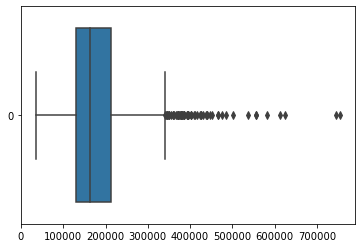

In [188]:
sns.boxplot(data=train["SalePrice"], orient='h')

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

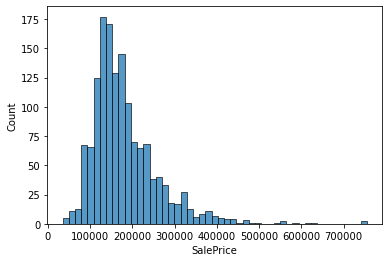

In [197]:
sns.histplot(data=train["SalePrice"])

In [119]:
X = train.drop(columns=["SalePrice"])
y = train["SalePrice"]

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [194]:
print('MSE: ', mean_squared_error(y_test, y_pred).round(2))
print('RMSE: ', (mean_squared_error(y_test, y_pred)**0.5).round(2))
print('MAE: ', mean_absolute_error(y_test, y_pred).round(2))
print('R2: ', r2_score(y_test, y_pred).round(3)*100,'%')

MSE:  1362437470.29
RMSE:  36911.21
MAE:  25252.2
R2:  80.9 %


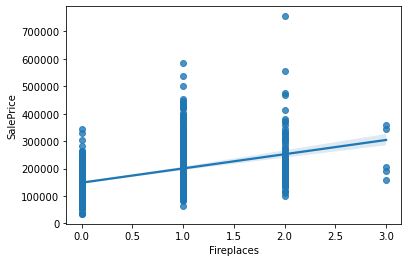

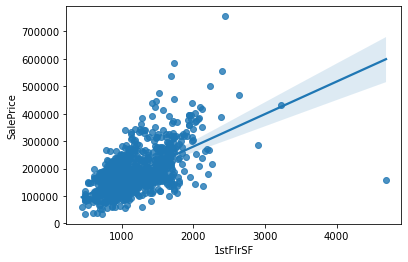

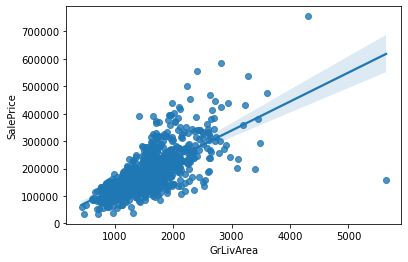

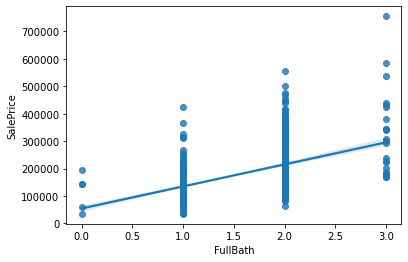

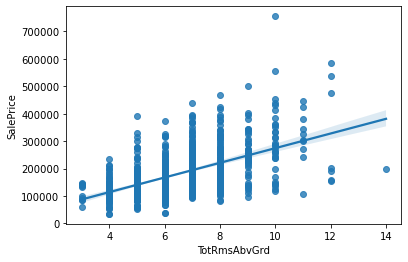

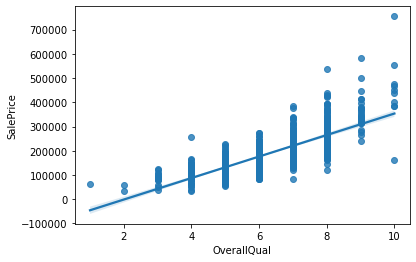

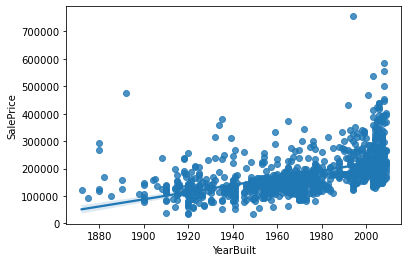

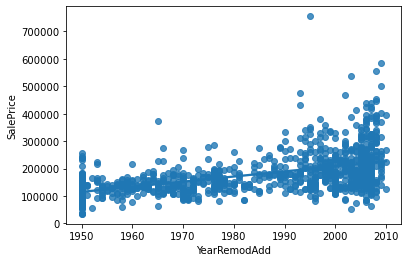

In [161]:
for i, col in enumerate(X_train.columns):
    plt.figure(i)
    sns.regplot(x=X_train[col], y=y_train)

In [122]:
y_pred

array([154012.75794031, 307352.29477664, 106221.99849503, 170974.31673225,
       282909.67672858,  70928.12768627, 231267.40385023, 169720.43635827,
        69374.82219928, 123932.76013835, 160373.14237456, 108092.06814118,
        47788.42855551, 221911.22658301, 199943.5604359 , 125373.90760882,
       222596.233787  , 136081.03785473, 123923.04097151, 217089.04765285,
       189239.60649542, 227784.69756532, 177638.62351715, 117790.09799974,
       209726.23864992, 166451.27338328, 209365.48054457,  72311.54436464,
       193459.36923677, 219850.87218175, 109269.37807943, 242231.81073359,
       233930.04557256,  82552.0635183 , 263451.33724734, 156591.19872002,
       160723.3311274 , 232611.72038078, 287582.66200942,  98561.56337694,
       132147.05904971, 257200.9519474 , 115912.38333929, 294683.05966751,
       110891.03438813, 150899.39703308, 107730.635651  , 113178.93147171,
       341216.16962646, 131490.65953354, 103136.45836433, 202280.51183064,
       137031.43213386, 3

In [123]:
y_test

892     154500.0
1105    325000.0
413     115000.0
522     159000.0
1036    315500.0
614      75500.0
218     311500.0
1160    146000.0
649      84500.0
887     135500.0
          ...   
1454    185000.0
549     263000.0
462      62383.0
129     150000.0
845     171000.0
331     139000.0
323     126175.0
650     205950.0
439     110000.0
798     485000.0
Name: SalePrice, Length: 438, dtype: float64